In [120]:
import altair as alt
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='ticks')

# Read in Data

In [121]:
df = pd.read_excel('Data Collection for AB-BA-SBE (10).xlsx', sheet_name='Research_Short_Term') #read in colleges dataframe
df = df[pd.to_numeric(df['Latitude'], errors='coerce').notnull()] #clean df
df.rename(columns={'People (LAST, FIRST—Separate People With Semicolons)':'People'}, inplace=True)
def take_first_link(links): # takes a string of links separated by a semicolon and returns the first link
    if type(links)==str: return links.split(';')[0]
    else: pass



df['Link'] = df['Research Link'].apply(take_first_link)
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude)) #convert to GeoDataFrame so we can use gpd plotting

usa_can = gpd.read_file('states_provinces/ne_10m_admin_1_states_provinces.shp') #create GeoDataFrame of world regions

usa_can = usa_can.loc[(usa_can.admin=='Canada') | (usa_can.admin=='United States of America') & (usa_can.name!='Hawaii') & (usa_can.name!='Alaska') ]
#^ select only Canada and the USA, drop Hawaii and Alaska because no research output and for aesthetic purposes
df

,Institution,Enterprise,Discipline,Latitude,Longitude,People,Research Link,Course Name (If Applicable),Course Link,Program (*fill FALSE if N/A),Type of Program,Program Link,Country,State/Province,Research Center?,Center Name,Link,Notes,geometry
0,University of British Columbia,Academia,Astrobiology,49.2606,-123.2460,"Gladman, Brett",https://www.astro.ubc.ca/people/gladman/progra...,ASTR 333,https://courses.students.ubc.ca/cs/coursesched...,NaN,NaN,NaN,Canada,British Columbia,NaN,NaN,https://www.astro.ubc.ca/people/gladman/progra...,NaN,POINT (-123.24600 49.26060)
1,University of Victoria,Academia,Astrobiology,48.4634,-123.3117,"Goldblatt, Colin",https://www.uvic.ca/research/centres/arc/peopl...,NaN,NaN,NaN,NaN,NaN,Canada,British Columbia,NaN,NaN,https://www.uvic.ca/research/centres/arc/peopl...,NaN,POINT (-123.31170 48.46340)
2,Simon Fraser University,Academia,Astrobiology,49.2781,-122.9199,"Unrau, Peter",https://www.sfu.ca/mbb/people/faculty/peter-un...,NaN,NaN,NaN,NaN,NaN,Canada,British Columbia,NaN,NaN,https://www.sfu.ca/mbb/people/faculty/peter-un...,NaN,POINT (-122.91990 49.27810)
3,University of Alberta,Academia,Astrobiology,53.5232,-113.5263,"Konhauser, Kurt",https://apps.ualberta.ca/directory/person/kurtk,NaN,NaN,NaN,NaN,NaN,Canada,Alberta,NaN,NaN,https://apps.ualberta.ca/directory/person/kurtk,NaN,POINT (-113.52630 53.52320)
4,University of Calgary,Academia,Astrobiology,51.0784,-114.1347,"Hubert, Casey",https://science.ucalgary.ca/biological-science...,NaN,NaN,NaN,NaN,NaN,Canada,Alberta,NaN,NaN,https://science.ucalgary.ca/biological-science...,NaN,POINT (-114.13470 51.07840)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,University of North Dakota,Academia,Bioastronautics,47.9229,-97.0768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,POINT (-97.07680 47.92290)
322,University of Southern California,Academia,Bioastronautics,34.0224,-118.2851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,POINT (-118.28510 34.02240)
323,University of Texas Medical Branch Galveston,Academia,Bioastronautics,29.3116,-94.7775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,POINT (-94.77750 29.31160)
324,University of Virginia,Academia,Bioastronautics,38.0336,-78.5080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,POINT (-78.50800 38.03360)


# Create Interactive Plot

In [117]:
# Create mouseover selection
select_institution = alt.selection_single(
    on="mouseover", nearest=True, fields=["Research Center?"], empty="none"
)


# US states background
background = alt.Chart(states).mark_geoshape(
    fill='lightgrey',
    stroke='white'
).properties(
    width=1000,
    height=600
).project('albersUsa')

# Institution positions on background
points = alt.Chart(df).mark_circle().encode(
    longitude='Longitude:Q',
    latitude='Latitude:Q',
    size=alt.value(15),
    tooltip=['Institution', 'Discipline', 'People'],
    color='Discipline',
    href='Link:N',
    shape='Program (*fill FALSE if N/A):N',
).properties(
    title='Map of Space Biosciences in North America'
)

chart = background + points
chart

alt.LayerChart(...)

In [123]:
chart.save('Interactive_Space_Biosciences_Map.html')

# Static Version

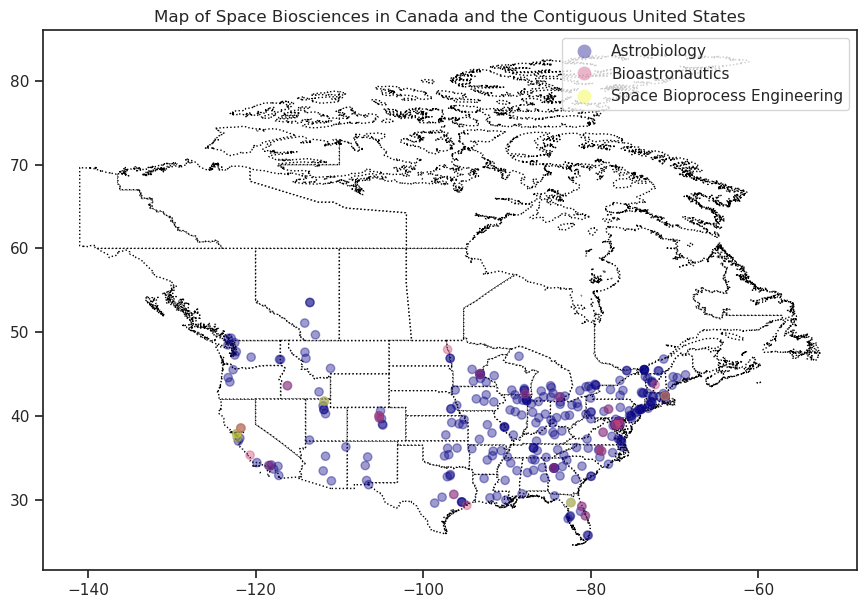

In [122]:
fig, ax = plt.subplots(figsize=(9, 10))
fig.tight_layout()
ax.set_title('Map of Space Biosciences in Canada and the Contiguous United States', fontsize=12)
usa_can.plot(ax=ax, edgecolor='black', color='white', linestyle=':') #Plots the background map (i.e. states)
gdf.plot(ax=ax, cmap='plasma', column='Discipline', legend=True, alpha=0.4) #Plots the colleges
plt.savefig('plos_map_300dpi', dpi=300)